# Linear Regression

In [96]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/salomekoller/Documents/KI-Anwendungen/projectX/data


In [97]:
dfmens1 = pd.read_csv('../backend/menstrual_cycle_data_enriched_per_CYCLE.csv', sep=',', encoding='utf-8')
dfmens1.head(5)

,ClientID,CycleNumber,CycleWithPeakorNot,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses,...,MensesScoreDayEight,MensesScoreDayNine,MensesScoreDayTen,MensesScoreDay11,TotalMensesScore,Age,Height,Weight,Numberpreg,BMI
0,nfp8122,1,1,29,17,12,12,5,9,5,...,0,0,0,0,10,36.0,160.02,54.43,3.0,21.25
1,nfp8122,2,1,27,15,12,13,2,6,5,...,0,0,0,0,10,36.0,160.02,54.43,3.0,21.25
2,nfp8122,3,1,29,15,14,11,1,5,5,...,0,0,0,0,10,36.0,160.02,54.43,3.0,21.25
3,nfp8122,4,1,27,15,12,13,2,6,5,...,0,0,0,0,12,36.0,160.02,54.43,3.0,21.25
4,nfp8122,5,1,28,16,12,12,4,8,5,...,0,0,0,0,11,36.0,160.02,54.43,3.0,21.25


# Simple linear regression

Create train and test samples (80 20)

In [98]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(dfmens1['LengthofCycle'], 
                                                    dfmens1['FirstDayofHigh'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
266     31
148     30
566     30
743     30
1322    29
Name: LengthofCycle, dtype: int64 

y_train:
266      9
148     10
566     15
743      9
1322    18
Name: FirstDayofHigh, dtype: int64


Fit the simple linear regression model

In [99]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            1.57
Slope of regression line (beta):          0.343
p-value:                                  0.0000
R-squared (coefficient of determination): 0.1959


Plot regression line

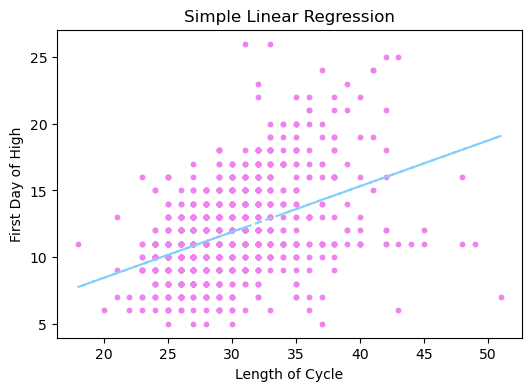

In [121]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='violet')
plt.plot(X_train, mymodel, color='lightskyblue', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('Length of Cycle')
plt.ylabel('First Day of High')

plt.show()

Check model residuals (residuals = predicted values minus observed values)

In [101]:
# Calculate residuals (here: predicted prices minus observed prices)
residuals = mymodel - y_train

# Check the first residual value in our data set
print(f'1st Predicted day in dataset: {mymodel[0]:.2f}')
print(f'1st Observed day in dataset: {y_train[0]:.2f}')
print(f'1st Residual day in dataset: {residuals[0]:.2f}')

1st Predicted day in dataset: 12.22
1st Observed day in dataset: 12.00
1st Residual day in dataset: 0.22


Plot Residuals

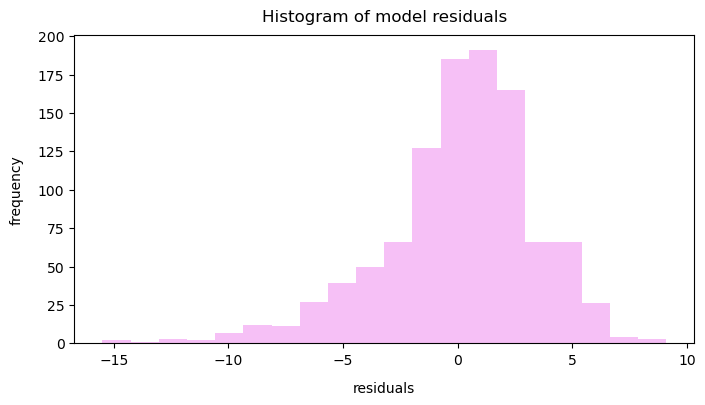

In [102]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=20, 
                            color='violet',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

Compare the predicted prices with the observed prices in our test sample

In [103]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare predicted with observed price based on first 10 test samples
for i in range(0,10):
    print(f'Predicted day: {predicted.iloc[i]:.1f}, Observed day: {y_test.iloc[i]:.1f}')

Predicted day: 10.5, Observed day: 8.0
Predicted day: 12.6, Observed day: 10.0
Predicted day: 10.8, Observed day: 11.0
Predicted day: 11.2, Observed day: 7.0
Predicted day: 10.5, Observed day: 13.0
Predicted day: 11.5, Observed day: 12.0
Predicted day: 13.6, Observed day: 11.0
Predicted day: 10.2, Observed day: 11.0
Predicted day: 10.8, Observed day: 11.0
Predicted day: 12.6, Observed day: 14.0


In [104]:
print('Mean of First Day of High: ', dfmens1.FirstDayofHigh.mean())

Mean of First Day of High:  11.650391802290537


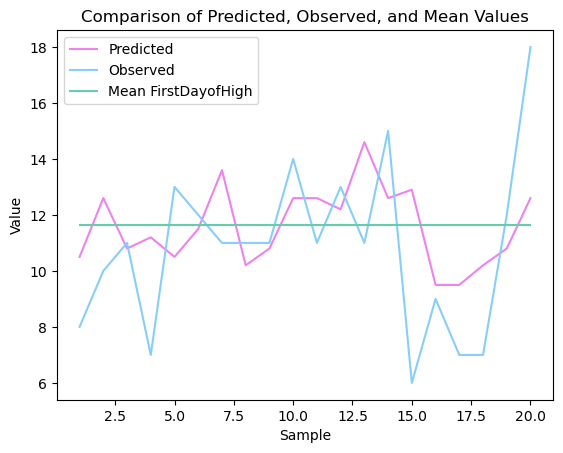

In [118]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted_rounded = predicted.round(1)

# Extract the first 10 predicted and observed values
predicted_subset = predicted_rounded.iloc[:20]
y_test_subset = y_test.iloc[:20]

# Calculate the mean value of 'FirstDayofHigh'
mean_value = dfmens1.FirstDayofHigh.mean()

# Create an array of x-coordinates for the data points
x = range(1, len(predicted_subset) + 1)

# Plot the predicted and observed values
plt.plot(x, predicted_subset, color='violet', label='Predicted')
plt.plot(x, y_test_subset, color='lightskyblue', label='Observed')
plt.plot(x, [mean_value] * len(x), color='mediumaquamarine', label='Mean FirstDayofHigh')

# Set labels and title
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Comparison of Predicted, Observed, and Mean Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

Residuals in Values

In [106]:
for i in range(0,100):
    residualFirst = predicted - y_test

In [107]:
residualFirst.count

<bound method Series.count of 1043    2.503382
352     2.563786
1290   -0.153217
1047    4.190183
1453   -2.496618
          ...   
1577    0.533584
1169    0.533584
163    -0.062612
1324   -6.749413
886    -3.123015
Length: 332, dtype: float64>

# Multiple linear regression (more than one explanatory variable in the model)

In [108]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(dfmens1[['LengthofCycle',
                                                            'Weight',
                                                            'Height',
                                                            'LengthofMenses']], 
                                                        dfmens1['FirstDayofHigh'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
      LengthofCycle  Weight  Height  LengthofMenses
266              31   54.43  162.56               6
148              30   58.97  175.26               5
566              30   63.50  160.02               5
743              30   97.07  162.56               7
1322             29   59.87  170.18               6 

y2_train:
266      9
148     10
566     15
743      9
1322    18
Name: FirstDayofHigh, dtype: int64


Fit multiple regression model

In [109]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:         FirstDayofHigh   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     84.10
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.12e-63
Time:                        18:41:27   Log-Likelihood:                -3192.0
No. Observations:                1327   AIC:                             6394.
Df Residuals:                    1322   BIC:                             6420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.7191      2.176     -1.

Interpretation of relevant statistics

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

Histogram of residuals

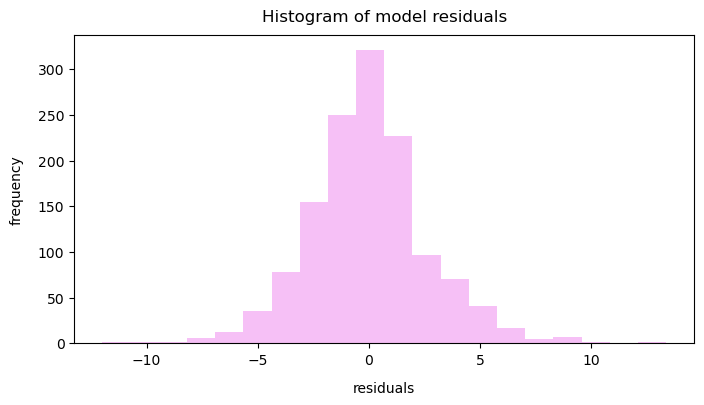

In [119]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=20, 
                            color='violet',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

Compare the predicted prices with the observed prices in the test sample

In [111]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare predicted with observed price based on first 10 test samples
for i in range(0,10):
    print(f'Predicted price: {predicted_new.iloc[i]:.1f}, Observed price: {y_test.iloc[i]:.1f}')

Predicted price: 10.7, Observed price: 8.0
Predicted price: 12.0, Observed price: 10.0
Predicted price: 10.9, Observed price: 11.0
Predicted price: 11.3, Observed price: 7.0
Predicted price: 10.6, Observed price: 13.0
Predicted price: 11.7, Observed price: 12.0
Predicted price: 13.5, Observed price: 11.0
Predicted price: 10.3, Observed price: 11.0
Predicted price: 11.0, Observed price: 11.0
Predicted price: 12.4, Observed price: 14.0


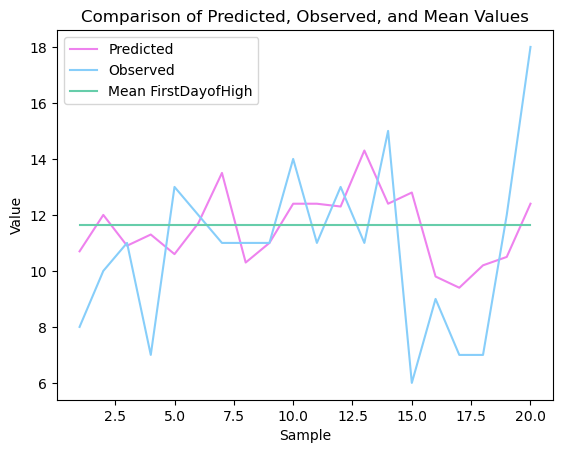

In [117]:
# Create model predictions for test data
predicted = predicted_new.round(1)

# Extract the first 10 predicted and observed values
predicted_subset = predicted.iloc[:20]
y_test_subset = y_test.iloc[:20]

# Calculate the mean value of 'FirstDayofHigh'
mean_value = dfmens1.FirstDayofHigh.mean()

# Create an array of x-coordinates for the data points
x = range(1, len(predicted_subset) + 1)

# Plot the predicted and observed values
plt.plot(x, predicted_subset, color='violet', label='Predicted')
plt.plot(x, y_test_subset, color='lightskyblue', label='Observed')
plt.plot(x, [mean_value] * len(x), color='mediumaquamarine', label='Mean FirstDayofHigh')

# Set labels and title
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Comparison of Predicted, Observed, and Mean Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()

Residuals in Values

In [113]:
for i in range(0,100):
    residual = predicted_new - y_test

In [114]:
residual.count

<bound method Series.count of 1043    2.748455
352     2.040269
1290   -0.109437
1047    4.253372
1453   -2.387315
          ...   
1577    0.452679
1169    0.015649
163     0.221102
1324   -6.671115
886    -3.228135
Length: 332, dtype: float64>